# 1. Install Dependencies and Setup

In [136]:
import tensorflow as tf
import os
from sklearn import metrics
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters as hp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras

# 2. Remove dodgy images

In [137]:
import cv2
import imghdr

In [138]:
# data_dir = 'data' 

train_dir = 'data/Train/'
test_dir = 'data/Test/'

In [139]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [140]:
for image_class in os.listdir(train_dir): 
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [141]:
for image_class in os.listdir(test_dir): 
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [142]:
import numpy as np
from matplotlib import pyplot as plt

In [143]:
# data = tf.keras.utils.image_dataset_from_directory('data') changed from relative path to variable

train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 366 files belonging to 4 classes.


y = np.concatenate([y for x, y in train_data], axis=0)
print (y)

In [144]:
for images, labels in train_data.take(-1):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

    print (numpy_images)
    print (numpy_labels)

[[[[177.       182.       178.      ]
   [ 99.52344  102.05078   98.875   ]
   [ 81.58594   82.171875  79.87891 ]
   ...
   [100.203125  98.203125  99.203125]
   [113.14453  111.49609  112.32031 ]
   [ 81.        81.        81.      ]]

  [[156.02734  161.02734  157.02734 ]
   [151.6841   154.21144  151.03566 ]
   [187.5552   188.14114  185.84818 ]
   ...
   [199.7035   197.7035   198.7035  ]
   [183.98712  182.33868  183.1629  ]
   [151.17773  151.17773  151.17773 ]]

  [[137.44531  143.12305  139.12305 ]
   [174.65268  178.97495  175.24057 ]
   [228.54492  229.72653  227.235   ]
   ...
   [242.12091  240.12091  241.12091 ]
   [226.60352  224.95508  225.7793  ]
   [193.07617  193.07617  193.07617 ]]

  ...

  [[142.0332   139.32227  138.      ]
   [180.77148  178.06055  176.73828 ]
   [235.6738   234.40039  233.07812 ]
   ...
   [254.70703  254.70703  254.70703 ]
   [244.6836   244.6836   244.6836  ]
   [201.       201.       201.      ]]

  [[139.41992  140.19336  138.38672 ]
   [178

In [145]:
print (image_path)

data/Test/Rot_Apple/rot_35.jpg


In [146]:
print (train_data.class_names)

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


In [147]:
test_data = tf.keras.utils.image_dataset_from_directory(test_dir)

Found 115 files belonging to 4 classes.


In [148]:
for images, labels in test_data.take(-1):  # only take first element of dataset
    numpy_test_images = images.numpy()
    numpy_test_labels = labels.numpy()

    print (numpy_test_images)
    print (numpy_test_labels)

[[[[2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   ...
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]]

  [[2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   ...
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]]

  [[2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   ...
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]]

  ...

  [[2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+

In [149]:
# data_iterator = data.as_numpy_iterator()
train_iterator = train_data.as_numpy_iterator()

In [150]:
test_iterator = test_data.as_numpy_iterator()

In [151]:
# batch = data_iterator.next()
train_batch = train_iterator.next()

In [152]:
test_batch = test_iterator.next()

VISUALISE TRAIN AND TEST DATA

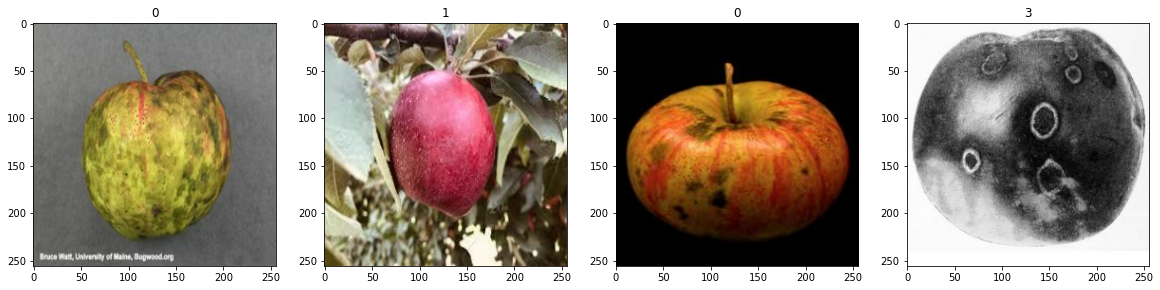

In [153]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    # ax[idx].title.set_text(train_batch[1][idx])
    ax[idx].set_title(train_batch[1][idx])

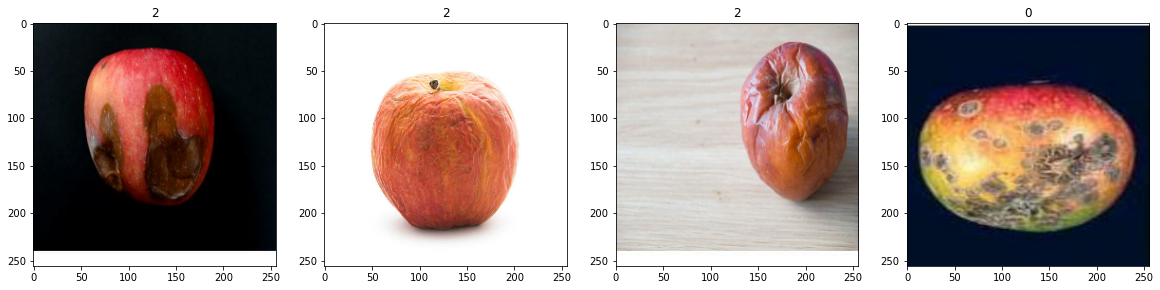

In [154]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(test_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])

# 4. Scale Data

In [155]:
train_data = train_data.map(lambda x,y: (x/255, y))

In [156]:
test_data = test_data.map(lambda x,y: (x/255, y))

In [157]:
train_data.as_numpy_iterator().next()

(array([[[[0.60493577, 0.60885733, 0.5892495 ],
          [0.6       , 0.6039216 , 0.58431375],
          [0.59234786, 0.5962694 , 0.5766616 ],
          ...,
          [0.5176471 , 0.5132812 , 0.5154641 ],
          [0.5320236 , 0.5320236 , 0.5320236 ],
          [0.53333336, 0.53333336, 0.53333336]],
 
         [[0.5955806 , 0.59950215, 0.5798943 ],
          [0.591659  , 0.5955806 , 0.57597274],
          [0.58118874, 0.5851103 , 0.56550246],
          ...,
          [0.52156866, 0.5172028 , 0.5193857 ],
          [0.536443  , 0.536443  , 0.536443  ],
          [0.5373103 , 0.5373103 , 0.5373103 ]],
 
         [[0.5879974 , 0.59191895, 0.5723111 ],
          [0.5821768 , 0.5860984 , 0.56649053],
          [0.5695236 , 0.57344514, 0.5538373 ],
          ...,
          [0.52330726, 0.52330726, 0.52330726],
          [0.5420037 , 0.5420037 , 0.5420037 ],
          [0.5414144 , 0.5414144 , 0.5414144 ]],
 
         ...,
 
         [[0.656013  , 0.5226797 , 0.6167973 ],
          [0.64621

In [158]:
test_data.as_numpy_iterator().next()

(array([[[[0.75686276, 0.7764706 , 0.7921569 ],
          [0.7607843 , 0.78039217, 0.79607844],
          [0.7607843 , 0.78039217, 0.79607844],
          ...,
          [0.7882353 , 0.80784315, 0.8235294 ],
          [0.7882353 , 0.80784315, 0.8235294 ],
          [0.7882353 , 0.80784315, 0.8235294 ]],
 
         [[0.75686276, 0.7764706 , 0.7921569 ],
          [0.7607843 , 0.78039217, 0.79607844],
          [0.7607843 , 0.78039217, 0.79607844],
          ...,
          [0.7882353 , 0.80784315, 0.8235294 ],
          [0.7882353 , 0.80784315, 0.8235294 ],
          [0.7882353 , 0.80784315, 0.8235294 ]],
 
         [[0.75686276, 0.7764706 , 0.7921569 ],
          [0.7607843 , 0.78039217, 0.79607844],
          [0.7607843 , 0.78039217, 0.79607844],
          ...,
          [0.7882353 , 0.80784315, 0.8235294 ],
          [0.7882353 , 0.80784315, 0.8235294 ],
          [0.7882353 , 0.80784315, 0.8235294 ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# 5. Split Data

In [159]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)
test_size = int(len(test_data))

In [160]:
# train_size

In [161]:
# val_size

In [162]:
# test_size

In [163]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# 6. Build Deep Learning Model

In [164]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [165]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(256,256,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(4, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [166]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='models',
    project_name='Apple Classifier Keras Tuner')

In [167]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': None}
conv_2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dense_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001], 'ordered': True}


In [168]:
tuner_search=RandomSearch(build_model,objective='val_accuracy',overwrite=True,max_trials=5,directory='output',project_name="Apple Classification Keras")

In [169]:
tuner_search.search(numpy_images,numpy_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 43s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 03m 37s
INFO:tensorflow:Oracle triggered exit


In [170]:
model=tuner_search.get_best_models(num_models=1)[0]

In [171]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 64)      36928     
                                                                 
 flatten (Flatten)           (None, 4000000)           0         
                                                                 
 dense (Dense)               (None, 80)                320000080 
                                                                 
 dense_1 (Dense)             (None, 4)                 324       
                                                                 
Total params: 320,042,196
Trainable params: 320,042,196
Non-trainable params: 0
_________________________________________________________________


# 7. Train

In [172]:
logdir='logs'

In [173]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [174]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 34s 4s/step - loss: 651.0541 - accuracy: 0.2361 - val_loss: 442.7908 - val_accuracy: 0.3750
Epoch 2/20
9/9 [==============================] - 33s 4s/step - loss: 254.7593 - accuracy: 0.2847 - val_loss: 187.5813 - val_accuracy: 0.3281
Epoch 3/20
9/9 [==============================] - 35s 4s/step - loss: 125.1005 - accuracy: 0.4514 - val_loss: 149.4945 - val_accuracy: 0.2344
Epoch 4/20
9/9 [==============================] - 38s 4s/step - loss: 114.7395 - accuracy: 0.4062 - val_loss: 137.9878 - val_accuracy: 0.4688
Epoch 5/20
9/9 [==============================] - 37s 4s/step - loss: 162.2415 - accuracy: 0.4028 - val_loss: 84.6170 - val_accuracy: 0.4688
Epoch 6/20
9/9 [==============================] - 33s 4s/step - loss: 59.5967 - accuracy: 0.5174 - val_loss: 79.1143 - val_accuracy: 0.3438
Epoch 7/20
9/9 [==============================] - 33s 4s/step - loss: 79.6988 - accuracy: 0.5069 - val_loss: 22.2164 - val_accuracy: 0.6719
Epoch 8/20


# 8. Plot Performance

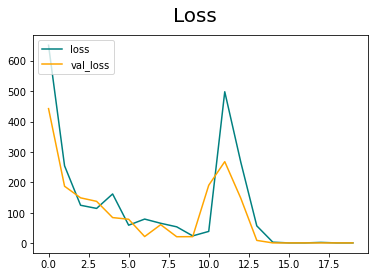

In [175]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [176]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


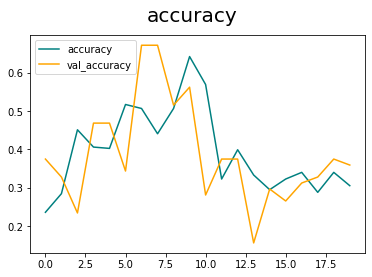

In [177]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [178]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [179]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [180]:
len(test)

4

In [181]:
for test_batch in test_data.as_numpy_iterator(): 
    X, y = test_batch
    yhat = model.predict(X)
    pred = np.argmax(yhat, axis=-1)
    # pre.update_state(y, yhat)
    # re.update_state(y, yhat)
    # acc.update_state(y, yhat)

    print (pred)
    print (y)

[0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 2 0 0 0 1 0 3 1 2 1 3 1 2 3 1 1 2 0 0 0 2 0 2 3 3 0 1 0 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 2 1 3 3 1 2 0 3 2 0 0 2 1 2 2 1 2 3 0 3 0 2 2 1 2 3 0 2 2 3 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 2 1 1 2 3 3 2 2 1 2 3 3 0 3 0 0 2 3 2 3 0 0 2 3 2 0 0 1 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 2 3 2 3 0 3 0 3 3 3 3 1 2 2 1 3]


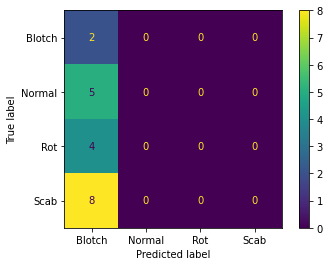

In [182]:

# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')

actual = y
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

cm_display.plot()
plt.show()

In [183]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [184]:
import cv2

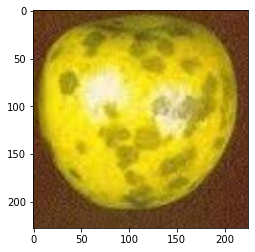

In [185]:
img = cv2.imread('data/Test/Blotch_Apple/blotch_2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

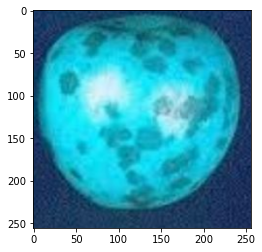

In [186]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [187]:
yhat = model.predict(np.expand_dims(resize/255, 0))
pred = np.argmax(yhat, axis=-1)

In [188]:
if pred == [3]: print ('the model predicts an apple with scab')
elif pred == [2]: print ('the model predicts an apple with rot')
elif pred == [1]: print ('the model predicts this is a normal healthy apple')
elif pred == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts this is a blotched apple


if num > 0:
    print("Positive number")
elif num == 0:
    print("Zero")
else:
    print("Negative number")

# 11. Save the Model and test loading the Model

In [189]:
from tensorflow.keras.models import load_model

In [190]:
model.save(os.path.join('models','appleclassifier1.h5'))

In [191]:
new_model = load_model('models/appleclassifier1.h5')

In [192]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 64)      36928     
                                                                 
 flatten (Flatten)           (None, 4000000)           0         
                                                                 
 dense (Dense)               (None, 80)                320000080 
                                                                 
 dense_1 (Dense)             (None, 4)                 324       
                                                                 
Total params: 320,042,196
Trainable params: 320,042,196
Non-trainable params: 0
_________________________________________________________________


In [193]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

In [194]:
pred_new = np.argmax(yhat_new, axis=-1)

In [195]:
if pred_new == [3]: print ('the model predicts an apple with scab')
elif pred_new == [2]: print ('the model predicts an apple with rot')
elif pred_new == [1]: print ('the model predicts this is a normal healthy apple')
elif pred_new == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts this is a blotched apple


De vragen die ik bij 2_1 nog had zijn beantwoord door uitwerking 

Nieuwe vraag:

voor het aanmaken van de data moet ik soms onderstaand commando runnen in terminal bij foutmelding:

find . -name "*.DS_Store" -type f -delete

wat is dit?


Van to do 1_2 zijn confusion matrix en plots afgehandeld

new to do - 
To do - image rescalen naar 100x100
expirimenteren met model / dataset en augmentation
transfer learning